In [37]:
# Import dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
# Bring in train.csv

train_df = pd.read_csv('obesity/train.csv', index_col=0)
train_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Create encode function

def encode(dataframe, columns):
    label_encoder = LabelEncoder()

    for column in columns:
        if column in dataframe.columns:
            mapped_values = label_encoder.fit_transform(dataframe[column])
            dataframe[f"{column}_encoded"] = mapped_values
        else:
            print(f"Column '{column}' not found in the DataFrame.")

    return dataframe

In [5]:
# Encode categories w/ strings for easy correlation mapping

train_encode_df = encode(train_df,['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad'])
train_encode_df = train_encode_df.drop(['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad'], axis = 1)
train_encode_df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,CAEC_encoded,SMOKE_encoded,SCC_encoded,CALC_encoded,MTRANS_encoded,NObeyesdad_encoded
id,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,1,1,2,0,0,1,3,6
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0,1,1,1,0,0,2,0,1
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,1,1,2,0,0,2,3,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,0,1,1,2,0,0,1,3,4
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,1,1,2,0,0,1,3,6


In [6]:
train_encode_df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_encoded', 'family_history_with_overweight_encoded',
       'FAVC_encoded', 'CAEC_encoded', 'SMOKE_encoded', 'SCC_encoded',
       'CALC_encoded', 'MTRANS_encoded', 'NObeyesdad_encoded'],
      dtype='object')

In [9]:
# Change the encoded columns' names to original, it just looks cleaner!

def remove_encoded_suffix(df):
    new_columns = [col.replace('_encoded', '') for col in df.columns]
    df.columns = new_columns
    return df

train_encode_df = remove_encoded_suffix(train_encode_df)
train_encode_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,1,1,2,0,0,1,3,6
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0,1,1,1,0,0,2,0,1
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,1,1,2,0,0,2,3,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,0,1,1,2,0,0,1,3,4
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,1,1,2,0,0,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,1,1,1,2,0,0,1,3,3
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,1,0,1,1,0,0,1,3,0
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,1,1,1,2,0,0,2,3,3


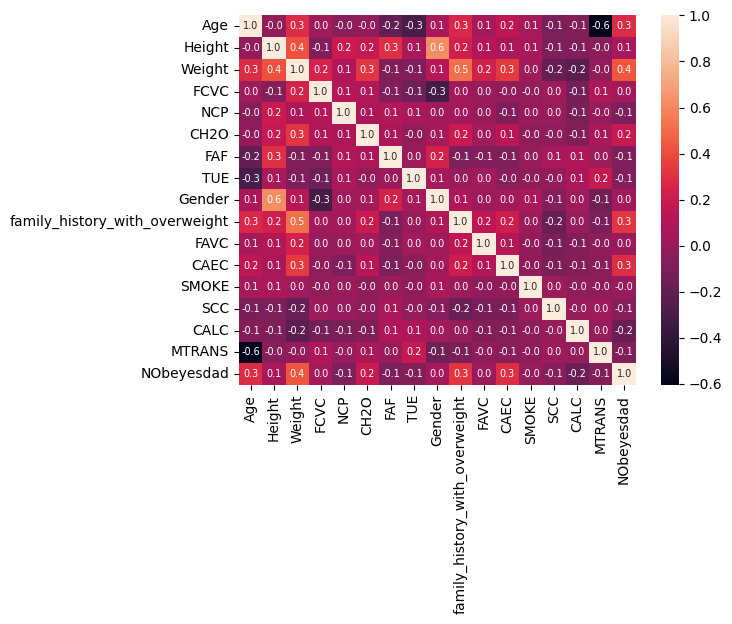

In [26]:
# Create a heatmap for correlation

sns.heatmap(train_encode_df.corr(), annot= True, annot_kws={"fontsize":7},fmt=".1f")
plt.show()

In [39]:
# save the dataframe as "train_encoded.csv" to process for training of models

train_encode_df.to_csv("obesity/train_encoded.csv",index = False)